# This script 
=> loads preprocessed training data 

=> splits it into training and validation sets 

=> compiles UNet++ model using the Adam optimizer with a binary cross-entropy loss function 

=> trains each model for a specified number of epochs 

=> ModelCheckpoint callbacks are used to save the best-performing models based on validation accuracy during training

In [32]:
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.models import load_model
import matplotlib.pyplot as plt

# Load preprocessed data

In [33]:
X_train = np.load(r'C:\Users\20301207\Downloads\Project_CSE439-Machine_Vision-_BRACU-main\S1_preprocessing\X_train.npy')
y_train = np.load(r'C:\Users\20301207\Downloads\Project_CSE439-Machine_Vision-_BRACU-main\S1_preprocessing\y_train.npy')
X_val = np.load(r'C:\Users\20301207\Downloads\Project_CSE439-Machine_Vision-_BRACU-main\S1_preprocessing\X_val.npy')
y_val = np.load(r'C:\Users\20301207\Downloads\Project_CSE439-Machine_Vision-_BRACU-main\S1_preprocessing\y_val.npy')
X_test = np.load(r'C:\Users\20301207\Downloads\Project_CSE439-Machine_Vision-_BRACU-main\S1_preprocessing\X_test.npy')
y_test = np.load(r'C:\Users\20301207\Downloads\Project_CSE439-Machine_Vision-_BRACU-main\S1_preprocessing\y_test.npy')

# Load or define the UNet++ model

In [34]:
model = load_model(r'C:\Users\20301207\Downloads\Project_CSE439-Machine_Vision-_BRACU-main\S2_Model\unet_plusplus.keras')

# Compile the model

In [35]:
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Train the model

In [36]:
history = model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.4805 - loss: 0.6715 - val_accuracy: 0.5686 - val_loss: 0.6675
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.6376 - loss: 0.6432 - val_accuracy: 0.5280 - val_loss: 0.7501
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.6395 - loss: 0.6236 - val_accuracy: 0.8064 - val_loss: 0.6069
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.8480 - loss: 0.5519 - val_accuracy: 0.7315 - val_loss: 0.5805
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.8208 - loss: 0.4633 - val_accuracy: 0.8066 - val_loss: 0.4735
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.8511 - loss: 0.3904 - val_accuracy: 0.8040 - val_loss: 0.4612
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.8583 - loss: 0.3612 - val_accuracy: 0.8012 - val_loss: 0.4573
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.8435 - loss: 0.3770 - val_accuracy: 0.7897 - val_loss: 0.4670
Epoch 9/

# Save the trained model

In [37]:
model.save('Unetpp_trained_model.keras')

# Get training and validation loss from the history object

In [38]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss

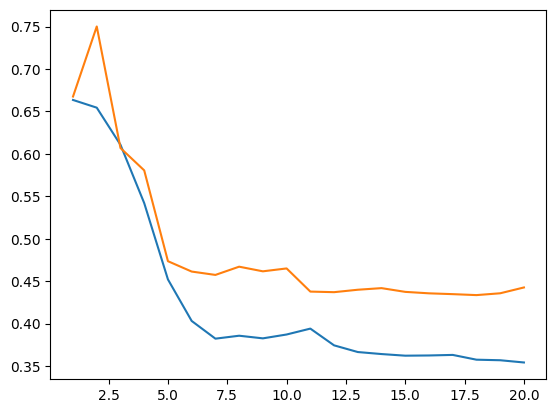

In [39]:
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')